## Программирование и компьютерные науки

## Семинар 4


На этом семинаре мы:
- изучим подробнее методы классификации
- рассмотрим метрики для оценки качества моделей классификации

## Линейная классификация

Ранее мы изучили задачу восстановления регрессии и способы её решения. В частности, для линейной модели с функционалом качества MSE решение данной задачи выписывается аналитически через матрицу "объект-признак" и вектор ответов обучающей выборки.

Давайте приступим к рассмотрению задачи классификации. Начнём с того, что вспомним её постановку.

### Постановка задачи классификации

Пусть задана обучающая выборка $X = \left\{ \left( x_i, y_i \right) \right\}_{i=1}^l, x_i \in \mathbb{X}, y_i \in \mathbb{Y},$ — $l$ пар объект-ответ, где
$\mathbb{X}$ — пространство объектов,
$\mathbb{Y}$ — пространство ответов.

Задача классификации отличается о задачи восстановления регрессии тем, что в данном случае пространство ответов конечно:
$$\left| \mathbb{Y} \right| < \infty.$$


**Примеры**:

1) Кредитный скоринг.
* Объект — заявка на кредит от клиента банка.
* Ответ — решение о выдаче или невыдаче кредита.

2) Медицинская диагностика.
* Объект — характеристики пациента (результаты анализов, общая информация о пациенте, история болезни).
* Ответ — диагноз (одно из ограниченного множества заболеваний).

В дальнейшем будем рассматривать задачу бинарной классификации (то есть разделения объектов на 2 группы) и полагать $\mathbb{Y} = \{-1, +1\}.$

### Линейная модель

Сегодня мы будем рассматривать линейную модель. В случае классификации формула для ответа на объекте $x$ видоизменяется по сравнению с линейной регрессией (при этом мы предполагаем, что нулевой признак в выборке — константный):
$$a(x) = sign(w_0 \cdot 1 + w_1 x_1 + \dots w_d x_d) = sign(\sum_{j = 0}^d w_j x_j) = sign(\langle w, x \rangle).$$

Множество точек $\langle w, x\rangle = 0$ является гиперплоскостью и делит пространство на 2 части по разные стороны от этой самой гиперплоскости. При этом объекты, расположенные по разные стороны от неё, полученный классификатор относит к различным классам в зависимости от знака скалярного произведения.

<tr>
<td> <img src="https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/seminars/images/plane.png?raw=1" alt="Drawing" style="width: 350px;"/> </td>
<td> <img src="https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/seminars/images/cube.png?raw=1" alt="Drawing" style="width: 350px;"/> </td>
</tr>

Отметим, что для некоторого объекта $x$ расстояние до гиперплоскости для фиксированного вектора весов $w$ можно записать как $\frac{\left| \langle w, x \rangle \right|}{\|w \|}$.

Поэтому чем больше $\left| \langle w, x \rangle \right|$, тем дальше объект отстоит от гиперплоскости, тем увереннее алгоритм в его классификации.

### Оптимизируемый функционал

Как и в случае линейной регрессии, поиск оптимального алгоритма среди множества всех линейных моделей в случае классификации производится путем оптимизации некоторого функционала. Можно было бы рассматривать MAE или MSE, как и в случае регрессии, однако в случае классификации этот подход кажется немного странным, как минимум, потому что классы могут задаваться своими названиями, а не номерами. Их можно было бы занумеровать, но тогда результат будет сильно зависеть от способа нумерации.

Будем минимизировать долю неверных классификаций, которую можно записать в следующем виде:

$$Q(w, X) = \frac{1}{l} \sum_{i = 1}^l [a(x_i) \ne y_i] \to \min_w.$$

В этом функционале слагаемое $[a(x_i) \ne y_i]$ отвечает за то, была ли допущена алгоритмом $a(\cdot)$ ошибка на объекте $x_i$.

Заметим, что $[a(x_i) \ne y_i] = [sign \, \langle w, x_i \rangle \ne sign \, y_i] = [y_i \langle w, x_i \rangle < 0],$ поэтому функционал можно переписать в следующем виде:
$$Q(w, X) = \frac{1}{l} \sum_{i = 1}^l [y_i \langle w, x_i \rangle  < 0] \to \min_w.$$

Величина $M_i = y_i \langle w, x_i \rangle$ называется **отступом** объекта $x_i$. Как было показано ранее:
* объект верно классифицируется тогда и только тогда, когда отступ положительный;
* чем больше значение отступа, тем надёжнее классифицируется объект.

Тем не менее, получившийся функционал не получится оптимизировать градиентными методами. Поэтому рассмотрим пороговую функцию потерь для одного объекта $L(M) = [M < 0],$ участвующую в формуле функционала, оценим её сверху некоторой гладкой функцией потерь и будем минимизировать её:

$$Q(w, X) = \frac{1}{l} \sum_{i = 1}^l [M_i < 0] = \frac{1}{l} \sum_{i = 1}^l L(M_i) \le \frac{1}{l} \sum_{i = 1}^l \widetilde{L}(M_i) = \widetilde{Q}(w, X) \to \min_{w}$$

Примеры оценок сверху для одного объекта:
<img src="https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/seminars/images/est.png?raw=1" alt="Drawing" style="width: 650px;">

- L = $log(1 + e^{-y_i\langle w, x \rangle})$ 
- V = $max(0, -M_i)$ - перцептрон
- H = $max(0, 1 - M_i)$ - Hinge (SVM)
- Q = $(M_i - 1) ^ 2$

**ВАЖНО**: мы минимизируем верхнюю оценку и надеемся, что тогда будет минимизироваться и исходный функционал $Q(w, X)$, однако нет никаких гарантий, что так и будет!

В зависимости от выбранной верхней оценки будут меняться свойства итогового алгоритма, положение разделяющей гиперплоскости и т.п.

### Итог

Таким образом, процесс обучения линейного классификатора складывается из следующих шагов:

* Получение обучающей выборки $X = \{ \left( x_i, y_i \right) \}_{i=1}^l$
* Выбор верхней оценки для пороговой функции потерь — отсюда получаем общий вид оптимизируемого функционала $\widetilde{Q}(w, X^l)$
* Проводим оптимизацию при помощи некоторого метода оптимизации и получаем оптимальное значение $w^*$
* Предсказываем ответы для новых объектов по формуле $a(x) = \langle w^*, x\rangle$

### Логистическая регрессия

Рассмотрим в качестве верхней оценки пороговой функции потерь логистическую функцию:

$$\widetilde{L}(M) = \log_2(1 + \exp(-M)).$$

Таким образом, необходимо решить следующую оптимизационную задачу:
$$\frac{1}{l} \sum_{i=1}^l \widetilde{L} (M_i) = \frac{1}{l} \sum_{i=1}^l \log_2 (1 + \exp (-y_i \langle w, x_i \rangle)) \to \min_w$$

Получившийся метод обучения называется **логистической регрессией**.

Одно из полезных свойств логистической регрессии, которое будет изучено нами несколько позднее, — тот факт, что она позволяет предсказывать помимо метки класса ещё и вероятность принадлежности каждому из них, что может быть полезным в некоторых задачах.

**Пример**: Вы работаете в банке и хотите выдавать кредиты только тем клиентам, которые вернут его с вероятностью не меньше 0.9.

### Пример обучения логистической регрессии

In [1]:
!wget -O 'data.csv' -q 'https://www.dropbox.com/s/6ql4expo67awjcb/data.csv?dl=0'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [3]:
data = pd.read_csv('data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.drop(labels=['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
data.dropna(inplace=True, subset=['Embarked'])
data['Age'].fillna(data.Age.median(), inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [7]:
cat_features = list(data.select_dtypes(include=['object']).columns)
num_features = list(data.select_dtypes(exclude=['object']).columns)
num_features.remove('Survived')

In [8]:
X, y = data.drop(labels='Survived', axis=1), data['Survived']

In [9]:
X_cat, X_num = X[cat_features], X[num_features]

In [10]:
encoder = OneHotEncoder()
X_cat_encoded = encoder.fit_transform(X_cat).toarray()
X_cat_encoded.shape

(889, 5)

In [12]:
encoder.categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [11]:
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)
X_num_scaled.shape

(889, 5)

In [13]:
X = np.hstack((X_num_scaled, X_cat_encoded))
X.shape

(889, 10)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, 
                                                    shuffle=True, stratify=y, 
                                                    random_state=42)

### Обучение логистической регрессии

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr_model = LogisticRegression(solver='liblinear', penalty='l1')
searcher = GridSearchCV(lr_model, 
                        param_grid={
                            "max_iter": [100, 200, 300],
                            "C": np.linspace(0, 5, 10)
                            },
                        n_jobs=-1,
                        cv=3,
                        verbose=1,
                        scoring='accuracy')
searcher.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
9 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/

GridSearchCV(cv=3,
             estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ]),
                         'max_iter': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [16]:
searcher.best_params_

{'C': 0.5555555555555556, 'max_iter': 100}

Оценим долю верных прогнозов полученной модели (accuracy) при помощи соответствующей функции из модуля [sklearn.metrics](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

In [17]:
from sklearn import metrics

preds = searcher.predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(y_test, preds):.2f}")

Accuracy: 0.80


In [19]:
searcher.best_estimator_.coef_

array([[-0.83619281, -0.43103902, -0.23715412, -0.06916561,  0.09876423,
         1.25428718, -1.32743427,  0.        ,  0.12149322, -0.31350948]])

In [20]:
num_features, cat_features

(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], ['Sex', 'Embarked'])

In [21]:
encoder.categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

Сгенерируем двумерную искуственную выборку из 2 различных нормальных распределений:

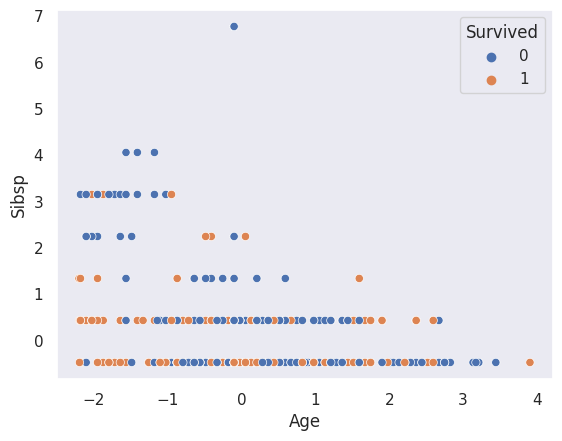

In [24]:
sns.set(style="dark")
sns.scatterplot(x=X_train[:, 1], y=X_train[:, 2], hue=y_train)
plt.xlabel('Age')
plt.ylabel('Sibsp')
plt.show()

Полученные в результате оптимизации коэффициенты линейной модели содержатся в атрибутах coef\_ и intercept\_ соответствующего объекта. Визуализируем разделяющую гиперплоскость алгоритма и рассмотрим значения предсказанных моделью вероятностей принадлежности нового объекта каждому из классов в зависимости от его координат.

In [26]:
searcher.best_estimator_.coef_, searcher.best_estimator_.intercept_

(array([[-0.83619281, -0.43103902, -0.23715412, -0.06916561,  0.09876423,
          1.25428718, -1.32743427,  0.        ,  0.12149322, -0.31350948]]),
 array([0.]))

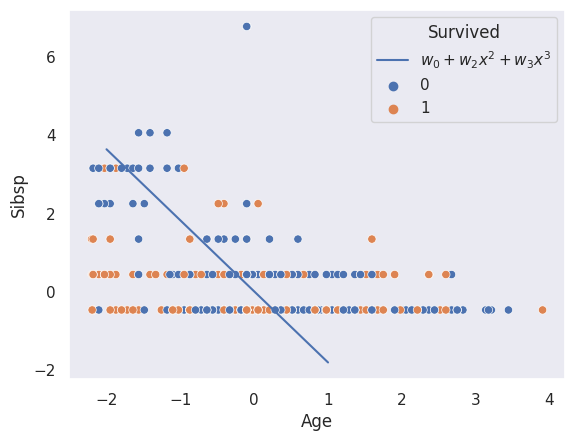

In [29]:
w_1 = searcher.best_estimator_.coef_[0][1]
w_2 = searcher.best_estimator_.coef_[0][2]
w_0 = searcher.best_estimator_.intercept_[0]

x_arr = np.linspace(-2, 1, 3000)
plt.plot(x_arr, -(w_0 + w_1 * x_arr) / w_2, label='$w_0 + w_2 x^2 + w_3 x^3 $')
sns.scatterplot(x=X_train[:, 1], y=X_train[:, 2], hue=y_train)
plt.xlabel('Age')
plt.ylabel('Sibsp')
plt.show()

Давайте попробуем посмотреть на Pclass как на категориальный признак

In [30]:
cat_features.append('Pclass')
num_features.remove('Pclass')
X, y = data.drop(labels='Survived', axis=1), data['Survived']
X_cat, X_num = X[cat_features], X[num_features]
encoder = OneHotEncoder()
X_cat_encoded = encoder.fit_transform(X_cat).toarray()
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)
X = np.hstack((X_num_scaled, X_cat_encoded))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, 
                                                    shuffle=True, stratify=y, 
                                                    random_state=42)

In [31]:
encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['C', 'Q', 'S'], dtype=object),
 array([1, 2, 3])]

In [32]:
searcher.fit(X_train, y_train)
preds = searcher.predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(y_test, preds):.2f}")

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Accuracy: 0.81


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
9 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/

In [33]:
searcher.best_estimator_.coef_

array([[-0.45232009, -0.26111117, -0.08253629,  0.1412113 ,  1.74279413,
        -0.89616861,  0.        ,  0.28323103, -0.34840628,  0.82506603,
         0.        , -1.17510929]])

### SGDClassifier

Объект [SGDClissifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) позволяет обучать линейные модели классификации и регрессии с помощью стохастического градиентного спуска.

Полезные параметры:
* loss - функция потерь (по факту то, какую модель обучаем): **hinge** (SVM), **log** (логистическая регрессия), **perceptron** (персептрон) и другие;
* penalty - тип регуляризации: **l1**, **l2**, **elasticnet** (смесь l1 и l2 регуляризации);
* alpha - коэффициент регуляризации;
* fit_intercept - необходимо ли добавлять в модель свободный член (True/False);
* n_iter - число эпох (полных проходов по выборке) при обучении;
* learning_rate - шаг градиентного спуска (оптимизируется по умолчанию).

In [34]:
from sklearn.linear_model import SGDClassifier

lr_sgd = SGDClassifier(loss="log_loss", alpha=0.05, fit_intercept=True)
lr_sgd.fit(X_train, y_train)
preds_sgd = lr_sgd.predict(X_test)
print(f'Accuracy {metrics.accuracy_score(y_test, preds_sgd):.2f}')

Accuracy 0.80


## Оценка качества работы классификатора
### Бинарные метрики
Обучение и оценка качества модели производится на независимых множествах примеров. Как правило, имеющующиеся примеры разбивают на два подмножества: обучение (`train`) и контроль (`test`). Выбор пропорции разбиения — компромисс: большой размер обучения ведет к более богатым информацией и качественным алгоритмам, большой размер контрольной выборки ведет к менее шумной оценке качества.

Для оценки качества классификации рассматривают [матрицу ошибок](http://en.wikipedia.org/wiki/Confusion_matrix): строчки соответствуют прогнозу модели, столбцы — истинным ответам, ячейки содержат число примеров тестовой выборки. Если для некоторого алгоритма $a(\cdot)$ и объекта $x$ выполняется $a(x) = 1$, то говорят, что алгоритм $a$ _выделяет_ объект $x$.

| | y = +1 | y = -1 |
|---|------|------|
|   **a(x) = +1**  | TP| FP |
| **a(x) = -1**| FN | TN |

Диагональ матрицы ошибок содержит правильно классифицированные положительные (TP) и отрицательные (TN) примеры. False Positive (FP) — ошибки I рода (ложное срабатывание, положили в спам хорошее письмо), False Negative (FN) — ошибки II рода (не отфильтровали спам). Ошибки I и II рода могут иметь различную стоимость.

Часто рассматриваются следующие метрики качества бинарной классификации:
  - Доля правильных ответов (Accuracy):
  $$accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$
  - Точность/precision (доля действительно положительных объектов среди объектов, выделенных алгоритмом):
  $$precision = \frac{TP}{TP + FP}$$
  - Полнота/recall (доля выделенных алгоритмом объектов среди всех положительных объектов выборки):
  $$recall = \frac{TP}{TP + FN}$$
  - $F_1$-мера (среднее гармоническое между точностью и полнотой)
  $$F_1 = \frac{2 \cdot Precision \cdot Recall}{Precision + Recall}$$
  
Подробнее про метрики качества бинарной классификации на Википедии: [Precision and Recall](http://en.wikipedia.org/wiki/Precision_and_recall).

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [ ]:
print(f'F1 score: {f1_score(y_test, preds):.2f}')
print(f'Precision: {precision_score(y_test, preds):.2f}')
print(f'Recall: {recall_score(y_test, preds):.2f}')

F1 score: 0.74
Precision: 0.80
Recall: 0.69


### Выбор порога классификации
Многие модели классификации получают оценку принадлежности положительному классу $b(x) \in \mathbb{R}$, после чего принимается решение о классификации объекта путем сравнения оценки с некоторым порогом:

$a(x) = \begin{cases}
        +1, \, b(x) \ge t,\\
        -1, \, b(x) < t.
        \end{cases}$
        
Матрица ошибок и все производные от нее метрики (Accuracy, Precision, Recall, etc.) зависят от порога $t$:
![Порог классификации](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/seminars/images/binary_threshold.png?raw=1) 

Поскольку иногда необходимо оценить качество модели $b(x),$ предсказывающей не конкретную метку класса, а степень принадлежности классу (т.е. вне зависимости от значения порога), рассматривают координатную плоскость, по осям которой отложены значения метрик, а качество работы классификатора представлено в виде кривой — траектории изменения соответствующих метрик при варьировании порога:

![Принцип построения ROC-кривой](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/seminars/images/roc_trajectory.png?raw=1)

Наиболее распространены ROC-кривые и Precision/Recall кривые.
 - По осям Ox и Oy ROC-кривой отложены соответственно False Positive Rate (FPR) и True Positive Rate (TPR):
 $$FPR = \frac{FP}{FP + TN},$$
 $$TPR = \frac{TP}{FN + TP}.$$
 - По осям Ox и Oy PR-кривой отложены соответственно Recall и Precision.


Аббревиатура ROC ([Receiver Operating Characteristic](en.wikipedia.org/wiki/Receiver_operating_characteristic)) была унаследована из инженерного дела.

![Примеры ROC-кривых](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/seminars/images/roc_and_pr_curves.png?raw=1)

В случае, если необходимо сравнить качество классификаторов вне зависимости от порога, применяют интегральные числовые метрики, например AUC-ROC (**A**rea **U**nder RO**C**) — площадь под ROC-кривой классификатора. AUC-ROC идеально работающего классификатора равно 1. Идеальный случайный классификатор в среднем имеет AUC-ROC=0.5.

Построим описанные кривые для логистической регрессии, обученной на описанном выше датасете.

* PR-кривая проходит через точку (0,0).

* Если при каком-то значении порога $t$ алгоритм $a(x)$ идеально разделяет объекты 2 классов, то PR-кривая проходит через точку (1,1).


In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
lr_model.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

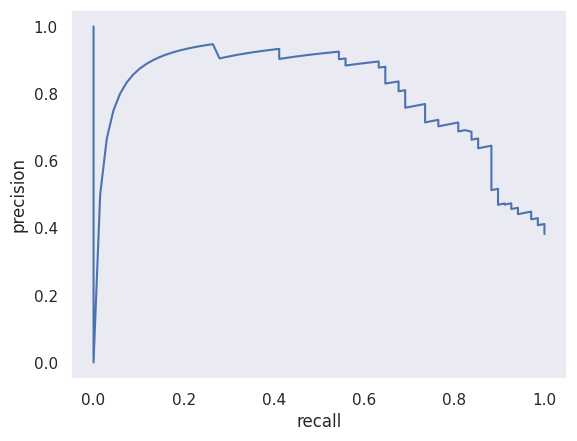

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [ ]:
from sklearn.metrics import auc

print(f'AUC PR: {auc(recall, precision):.2f}')

AUC PRC: 0.79


* ROC проходит через точки (0,0) и (1,1)
* Если при каком-то значении порога $t$ алгоритм $a(x)$ идеально разделяет объекты 2 классов, то ROC проходит через точку (0,1).


In [ ]:
from sklearn.metrics import roc_curve

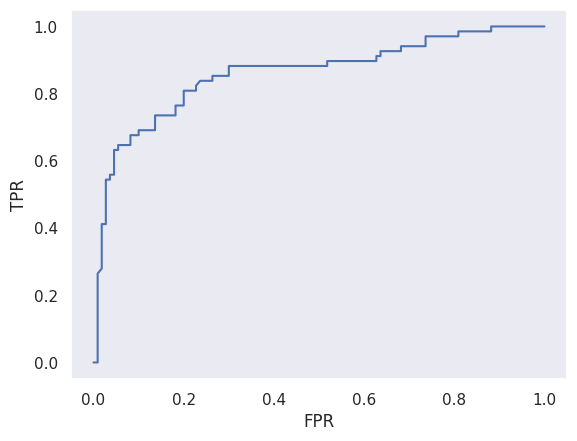

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
print(f'AUC ROC: {auc(fpr, tpr):.2f}')

AUC ROC: 0.86
